<a href="https://colab.research.google.com/github/lakshmitha66/2nd-internal/blob/main/exam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel('111.xlsx')
data

,height,WEIGHT,colour,age
0,2.0,3.0,red,2
1,6.0,8.0,black,10
2,NaN,NaN,black,6
3,4.0,NaN,brown,7
4,8.0,20.0,black,4
5,3.0,4.0,NaN,1
6,4.0,4.0,green,2
7,1.0,1.0,NaN,3


In [15]:
data.isnull()

,height,WEIGHT,colour,age
0,False,False,False,False
1,False,False,False,False
2,True,True,False,False
3,False,True,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,True,False


In [16]:
data.dropna()
data

,height,WEIGHT,colour,age
0,2.0,3.0,red,2
1,6.0,8.0,black,10
2,NaN,NaN,black,6
3,4.0,NaN,brown,7
4,8.0,20.0,black,4
5,3.0,4.0,NaN,1
6,4.0,4.0,green,2
7,1.0,1.0,NaN,3


In [24]:
data.fillna(0)

,height,WEIGHT,colour,age
0,2.0,3.000000,red,2
1,6.0,8.000000,black,10
2,4.0,6.666667,black,6
3,4.0,6.666667,brown,7
4,8.0,20.000000,black,4
5,3.0,4.000000,0,1
6,4.0,4.000000,green,2
7,1.0,1.000000,0,3


In [19]:
data['height'].fillna(data['height'].mean(),inplace=True)
data

,height,WEIGHT,colour,age
0,2.0,3.0,red,2
1,6.0,8.0,black,10
2,4.0,NaN,black,6
3,4.0,NaN,brown,7
4,8.0,20.0,black,4
5,3.0,4.0,NaN,1
6,4.0,4.0,green,2
7,1.0,1.0,NaN,3


In [20]:
data['WEIGHT'].fillna(data['WEIGHT'].mean(),inplace=True)
data

,height,WEIGHT,colour,age
0,2.0,3.000000,red,2
1,6.0,8.000000,black,10
2,4.0,6.666667,black,6
3,4.0,6.666667,brown,7
4,8.0,20.000000,black,4
5,3.0,4.000000,NaN,1
6,4.0,4.000000,green,2
7,1.0,1.000000,NaN,3


In [21]:
data['colour'].fillna(data['colour'].mode(),inplace=True)
data

,height,WEIGHT,colour,age
0,2.0,3.000000,red,2
1,6.0,8.000000,black,10
2,4.0,6.666667,black,6
3,4.0,6.666667,brown,7
4,8.0,20.000000,black,4
5,3.0,4.000000,NaN,1
6,4.0,4.000000,green,2
7,1.0,1.000000,NaN,3


<function matplotlib.pyplot.show(*args, **kw)>

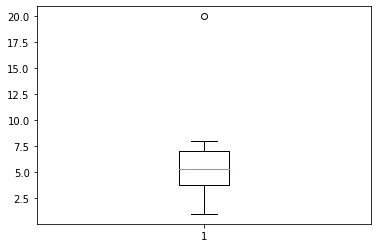

In [25]:
plt.boxplot(data['WEIGHT'])
plt.show

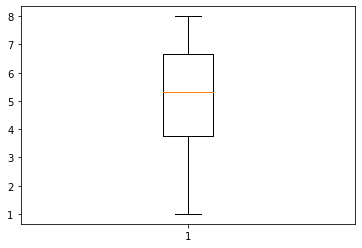

In [26]:
for i in data["WEIGHT"]:
  q1=data["WEIGHT"].quantile(0.25)
  q3=data["WEIGHT"].quantile(0.75)
  iqr=q3-q1
  lower_tail=q1-1.5*iqr
  upper_tail=q3+1.5*iqr
  if i> upper_tail or i<lower_tail:
    data["WEIGHT"]=data["WEIGHT"].replace(i,np.mean(data["WEIGHT"]))
plt.boxplot(data["WEIGHT"])
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  8 non-null      float64
 1   WEIGHT  8 non-null      float64
 2   colour  6 non-null      object 
 3   age     8 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 384.0+ bytes


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data[['height','WEIGHT','age']]) 
data_normalized = scaler.transform(data[['height','WEIGHT','age']]) 
data_normalized

array([[-0.9701425 , -0.90197523, -0.827653  ],
       [ 0.9701425 ,  1.35296285,  1.96023079],
       [ 0.        ,  0.75164603,  0.56628889],
       [ 0.        ,  0.75164603,  0.91477437],
       [ 1.940285  ,  0.75164603, -0.13068205],
       [-0.48507125, -0.45098762, -1.17613847],
       [ 0.        , -0.45098762, -0.827653  ],
       [-1.45521375, -1.80395047, -0.47916753]])

In [33]:
data_normalized=pd.DataFrame(data_normalized,columns=['height','WEIGHT','age'])
data_normalized=data_normalized.join(data[data.columns.drop(['height','WEIGHT','age'])])
data_normalized

,height,WEIGHT,age,colour
0,-0.970143,-0.901975,-0.827653,red
1,0.970143,1.352963,1.960231,black
2,0.000000,0.751646,0.566289,black
3,0.000000,0.751646,0.914774,brown
4,1.940285,0.751646,-0.130682,black
5,-0.485071,-0.450988,-1.176138,NaN
6,0.000000,-0.450988,-0.827653,green
7,-1.455214,-1.803950,-0.479168,NaN


In [34]:
data_df=pd.get_dummies(data['colour'])
data_df

,black,brown,green,red
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
5,0,0,0,0
6,0,0,1,0
7,0,0,0,0


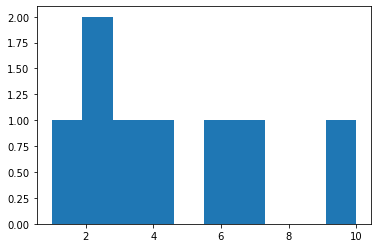

In [35]:
plt.hist(data["age"])
plt.show()

In [36]:
data['bins']=pd.cut(x=data['age'],bins=[0,5,10,15,20],labels=["0-5","6-9","11-15","16-20"])
print(data['bins'])
print(data['bins'].unique)

0    0-5
1    6-9
2    6-9
3    6-9
4    0-5
5    0-5
6    0-5
7    0-5
Name: bins, dtype: category
Categories (4, object): ['0-5' < '6-9' < '11-15' < '16-20']
<bound method Series.unique of 0    0-5
1    6-9
2    6-9
3    6-9
4    0-5
5    0-5
6    0-5
7    0-5
Name: bins, dtype: category
Categories (4, object): ['0-5' < '6-9' < '11-15' < '16-20']>


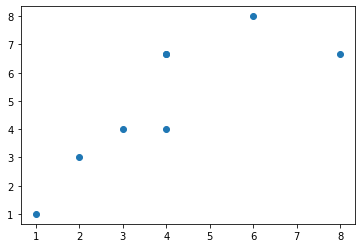

In [37]:
plt.scatter(data["height"],data["WEIGHT"])
plt.show()